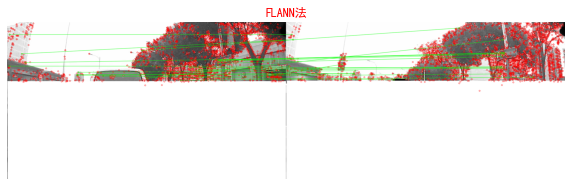

In [ ]:
import cv2

from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

"""
FLANN是类似最近邻的快速匹配库
    它会根据数据本身选择最合适的算法来处理数据
    比其他搜索算法快10倍
"""
# 按照灰度图片读入
img1 = cv2.imread(r"D:\projects\tensorflowModelGarden\my_test\000006_3_2019-05-05-07-33-04.jpg",cv2.IMREAD_GRAYSCALE)#导入灰度图像
img2 = cv2.imread(r"D:\projects\tensorflowModelGarden\my_test\000006_4_2019-05-05-07-33-19_2.jpg",cv2.IMREAD_GRAYSCALE)
# 创建sift检测器
sift = cv2.xfeatures2d.SIFT_create()
# 查找监测点和匹配符
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
"""
keypoint是检测到的特征点的列表
descriptor是检测到特征的局部图像的列表
"""
# 获取flann匹配器
FLANN_INDEX_KDTREE = 0
# 参数1：indexParams
#    对于SIFT和SURF，可以传入参数index_params=dict(algorithm=FLANN_INDEX_KDTREE, trees=5)。
#    对于ORB，可以传入参数index_params=dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12）。
indexParams = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
# 参数2：searchParams 指定递归遍历的次数，值越高结果越准确，但是消耗的时间也越多。
searchParams = dict(checks=50)


# 使用FlannBasedMatcher 寻找最近邻近似匹配
flann = cv2.FlannBasedMatcher(indexParams, searchParams)
# 使用knnMatch匹配处理，并返回匹配matches
matches = flann.knnMatch(des1, des2, k=2)
# 通过掩码方式计算有用的点
matchesMask = [[0, 0] for i in range(len(matches))]

# 通过描述符的距离进行选择需要的点
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance: # 通过0.7系数来决定匹配的有效关键点数量
        matchesMask[i] = [1, 0]

drawPrams = dict(matchColor=(0, 255, 0),
                 singlePointColor=(255, 0, 0),
                 matchesMask=matchesMask,
                 flags=0)
# 匹配结果图片
img33 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **drawPrams)


plt.figure(figsize=(10,10))
plt.title('FLANN法',fontsize=12,color='r')
plt.imshow(img33)
plt.axis('off')
plt.savefig('res.png')
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
